In [24]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

#regression
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge, HuberRegressor, Lasso
from sklearn.metrics import make_scorer, mean_squared_error,confusion_matrix,accuracy_score
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR  
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV 

#Classification
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

### Data Exploration

In [2]:
#reading and labeling data
def DataReading(filename):
    data=pd.read_csv(filename, sep=" ", header=None)
    # columns list
    COLS = ["ID", "Cycle", "OpSet1", "OpSet2", "OpSet3", "SensorMeasure1", "SensorMeasure2", "SensorMeasure3", "SensorMeasure4",
                "SensorMeasure5", "SensorMeasure6", "SensorMeasure7", "SensorMeasure8", "SensorMeasure9", "SensorMeasure10", "SensorMeasure11",
                "SensorMeasure12", "SensorMeasure13", "SensorMeasure14", "SensorMeasure15", "SensorMeasure16",
                "SensorMeasure17", "SensorMeasure18", "SensorMeasure19", "SensorMeasure20", "SensorMeasure21"]
    data =data[[f for f in range(0, 26)]]
    data.columns = ["ID", "Cycle", "OpSet1", "OpSet2", "OpSet3", "SensorMeasure1", "SensorMeasure2", "SensorMeasure3", "SensorMeasure4",
                "SensorMeasure5", "SensorMeasure6", "SensorMeasure7", "SensorMeasure8", "SensorMeasure9", "SensorMeasure10", "SensorMeasure11",
                "SensorMeasure12", "SensorMeasure13", "SensorMeasure14", "SensorMeasure15", "SensorMeasure16",
                "SensorMeasure17", "SensorMeasure18", "SensorMeasure19", "SensorMeasure20", "SensorMeasure21"]
    return data
    



#train data
train_data=DataReading("data set/aero/train_FD001.txt")

#test data
test_data=DataReading("data set/aero/test_FD001.txt")

In [4]:
# reading Rul of last cycle of each engin for test data
#reading data train data

Rul_data=pd.read_csv("data set/aero/RUL_FD001.txt", sep=" ", header=None)
Rul_data["ID"] = Rul_data.index + 1
Rul_data=Rul_data.rename(columns={0:"RUL"}).drop(1,axis=1)
Rul_data

,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN
...,...,...
95,137,NaN
96,82,NaN
97,59,NaN
98,117,NaN


THIS THE RUL OF LAST CYCLE OF DIFFRENT ENGINS OF TEST DATA

### Preprocessing

In [9]:
# maximun number of engines cycle in train data
max_cycles_df_train = train_data.groupby(["ID"], sort=False)["Cycle"].max().reset_index().rename(columns={"Cycle" : "MaxCycleID"})
max_cycles_df_train



# Calculating RUL form the max_cycles_df in train data
train_data = pd.merge(train_data, max_cycles_df_train, how="inner", on="ID")
train_data["RUL"] = train_data["MaxCycleID"] - train_data["Cycle"]
train_data.drop('MaxCycleID',inplace=True, axis=1)
train_data.head()

#coverting into binary Rul 
# 1 for okay
# 0 for not Okay
binary_RUL=train_data['RUL'].map(lambda x: 1 if x>=20 else 0)
train_data['Binary_RUL']=binary_RUL
pro_train_data=train_data
pro_train_data

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL,Binary_RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,1
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,1
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,1
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,1
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4,0
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3,0
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2,0
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1,0


In [10]:
# maximun number of engines cycle in test data
max_cycles_df_test = test_data.copy(deep=True).groupby(['ID'])["Cycle"].max().reset_index()
max_cycles_df_test

test_data = pd.merge(test_data, max_cycles_df_test, how="inner", on=["ID",'Cycle'])
test_data["RUL"]=Rul_data["RUL"]

#coverting into binary Rul 
# 1 for okay
# 0 for not Okay
binary_RUL=test_data['RUL'].map(lambda x: 1 if x>=20 else 0)
test_data['Binary_RUL']=binary_RUL
pro_test_data=test_data
pro_test_data


,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL,Binary_RUL
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,8130.11,8.4024,0.03,393,2388,100.0,38.81,23.3552,112,1
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,8126.90,8.4505,0.03,391,2388,100.0,38.81,23.2618,98,1
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,8131.46,8.4119,0.03,395,2388,100.0,38.93,23.2740,69,1
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,8133.64,8.4634,0.03,395,2388,100.0,38.58,23.2581,82,1
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,8125.74,8.4362,0.03,394,2388,100.0,38.75,23.4117,91,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,97,-0.0006,0.0003,100.0,518.67,642.30,1590.88,1397.94,14.62,...,8148.24,8.4110,0.03,391,2388,100.0,38.96,23.4606,137,1
96,97,134,0.0013,-0.0001,100.0,518.67,642.59,1582.96,1410.92,14.62,...,8155.48,8.4500,0.03,395,2388,100.0,38.61,23.2953,82,1
97,98,121,0.0017,0.0001,100.0,518.67,642.68,1599.51,1415.47,14.62,...,8146.39,8.4235,0.03,394,2388,100.0,38.76,23.3608,59,1
98,99,97,0.0047,-0.0000,100.0,518.67,642.00,1585.03,1397.98,14.62,...,8150.38,8.4003,0.03,391,2388,100.0,38.95,23.3595,117,1


### Analysing Data & feature selection


From the above graphs we can see that opset3 ,SensorMeasure 1,5,6,10,16,18,19 are constant for diffrent RULs.
so these features will not be use full for the training.

### Train and Test Sub Set For Training and testing

In [11]:
#droping opset3 ,SensorMeasure 1,5,6,10,16,18,19 from train data set
# making x_test y_test x_train  y_train

X_train=pro_train_data.drop(["ID","OpSet3","OpSet2","OpSet1","RUL","Binary_RUL",'SensorMeasure1','SensorMeasure5','SensorMeasure6','SensorMeasure10','SensorMeasure18','SensorMeasure19'],axis=1)

X_test=pro_test_data.drop(["ID","OpSet3","OpSet2","OpSet1","RUL","Binary_RUL",'SensorMeasure1','SensorMeasure5','SensorMeasure6','SensorMeasure10','SensorMeasure18','SensorMeasure19'],axis=1)

y_train=pro_train_data['RUL']

y_test=pro_test_data["RUL"]


0        191
1        190
2        189
3        188
4        187
        ... 
20626      4
20627      3
20628      2
20629      1
20630      0
Name: RUL, Length: 20631, dtype: int64

### Feature scaling

In [12]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)

array([[-1.56517022, -1.72172539, -0.13425518, ..., -0.78170979,
         1.34849274,  1.19442705],
       [-1.55065208, -1.06177971,  0.21152849, ..., -0.78170979,
         1.01652793,  1.23692196],
       [-1.53613393, -0.66181262, -0.41316559, ..., -2.07309423,
         0.73989059,  0.50342281],
       ...,
       [ 1.29490444,  1.47801126,  1.94697106, ...,  3.09244354,
        -2.08181033, -3.29248147],
       [ 1.30942258,  1.09804254,  2.40366648, ...,  1.15536688,
        -2.91172236, -2.08507166],
       [ 1.32394073,  2.33794049,  1.60771161, ...,  1.8010591 ,
        -2.46910261, -2.19408035]])

### Model Evaluation

In [46]:
def model(model):
    y_pred = model.predict(X_test)
    y_pred = pd.Series(y_pred)
    y_pred = y_pred.values 
    y_test_ = pd.Series(y_test) 
    y_test_ = y_test_.values 
    #print("Comparison:")
    #result = np.concatenate((y_pred.reshape(len(y_pred),1), y_test_.reshape(len(y_test_),1)),1)
    #print(result[1:500])
    
    c_matrix = confusion_matrix(y_test_, y_pred)
    print("Confusion Matrix = \n",c_matrix)
    print("Accuracy Score = ",(accuracy_score(y_test_, y_pred))*100)
    print("Train Score = ",(model.score(X_train, y_train))*100)
    print("Test Score = ",(model.score(X_test, y_test))*100)
    
    
    
    categories = ['Negative','Positive']
    prediction = ['True Negative','False Positive', 'False Negative','True Positive']
    percentage = ['{0:.2%}'.format(value) for value in c_matrix.flatten() / np.sum(c_matrix)]

    lab = [f'{m}\n{n}' for m, n in zip(prediction,percentage)]
    lab = np.asarray(lab).reshape(2,2)
    sns.heatmap(c_matrix,cmap = 'Greens' , fmt = '',annot = True, xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values")
    plt.ylabel("Actual values")
    plt.title ("Confusion Matrix")
    

### Model Selection for RUL

/home/alpha/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Mean Squared Error
SVM,565.832067
Neural Network,663.678139
RandomForest,757.416418
Huber,796.393545
Bagging,839.775400
BayesianRidge,968.347954
Ridge,968.987049
Linear,969.011725
Lasso,974.544430
AdaBoost,1301.639763


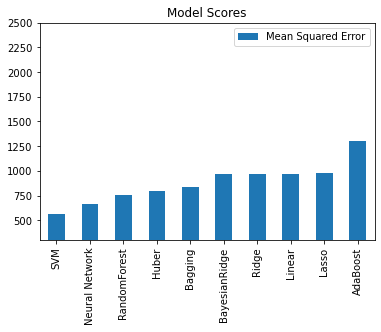

In [14]:
# RUL Model selection (Regression)
def analyse_regression_models(train, labels):
    results = {}
    
    def test_model(clf):
        clf.fit(X_train,y_train)
        y_pred=clf.predict(X_test)
        mse =mean_squared_error(y_pred,y_test)
        
        return mse
    
    clf = LinearRegression()
    results["Linear"] = test_model(clf)
    
    clf = Ridge()
    results["Ridge"] = test_model(clf)
    
    clf = BayesianRidge()
    results["BayesianRidge"] = test_model(clf)
    
    clf = HuberRegressor()
    results["Huber"] = test_model(clf)
    
    clf = Lasso()
    results["Lasso"] = test_model(clf)
    
    clf = MLPRegressor()
    results["Neural Network"] = test_model(clf)
    
    clf = BaggingRegressor()
    results["Bagging"] = test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"] = test_model(clf)
    
    clf = AdaBoostRegressor()
    results["AdaBoost"] = test_model(clf)
    
    clf = SVR()
    results["SVM"] = test_model(clf)
    
    results = pd.DataFrame.from_dict(results, orient='index')
    results.columns = ["Mean Squared Error"] 
    results = results.sort_values(by=["Mean Squared Error"], ascending=True)
    results.plot(kind="bar", title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([300, 2500])
    return results

analyse_regression_models(X_train, y_train)

Since SVM , Neural Network , Randam Forest are the model whose have lowest Mean Squared Error(MSE).So we can say these models have best fitting 

In [17]:
clf= GridSearchCV(

estimator=SVR(kernel='poly'),

param_grid={

'C': [1.1,3, 5.4,],

'epsilon': [0.0003, 0.007],

'gamma': [0.7001, 0.008]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)



clf.fit(X_train,y_train)

clf.cv_results_

KeyboardInterrupt: 

In [ ]:
cv_result=pd.DataFrame(clf.cv_results_)

### Predcition of engine faliure after 20 days

LogisticRegression

 Confusion Matrix  
 
 [[11  2]
 [ 1 86]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

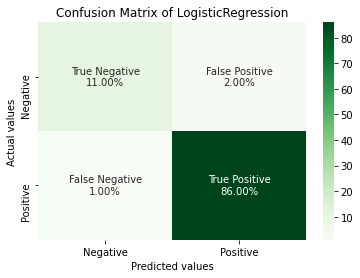

Naive Bayse

 Confusion Matrix  
 
 [[12  1]
 [ 8 79]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

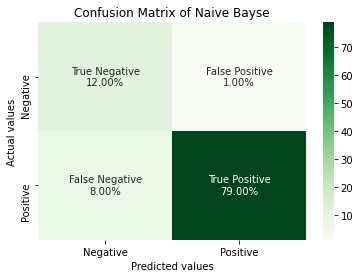

KNeighbors

 Confusion Matrix  
 
 [[11  2]
 [ 1 86]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

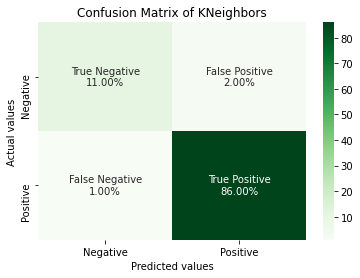

SVC

 Confusion Matrix  
 
 [[11  2]
 [ 3 84]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

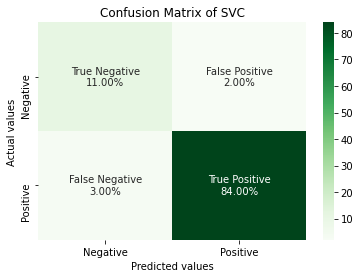

QuadraticDiscriminantAnalysis

 Confusion Matrix  
 
 [[ 1 12]
 [ 1 86]]


/home/alpha/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

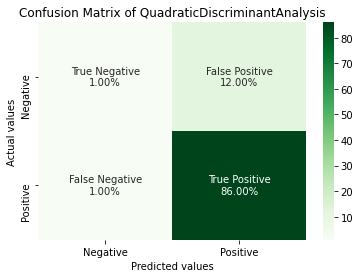

Neural Network

 Confusion Matrix  
 
 [[10  3]
 [ 1 86]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

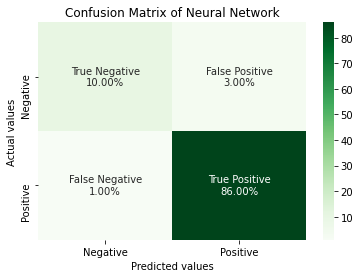

AdaBoost

 Confusion Matrix  
 
 [[12  1]
 [ 2 85]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

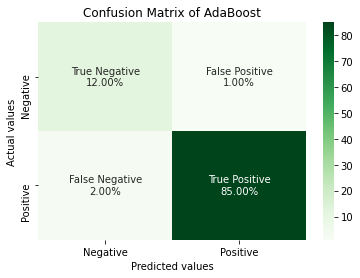

Decision Tree

 Confusion Matrix  
 
 [[10  3]
 [ 2 85]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

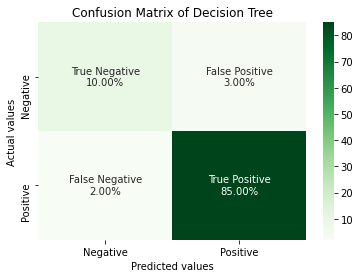

RandomForest

 Confusion Matrix  
 
 [[ 8  5]
 [ 2 85]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

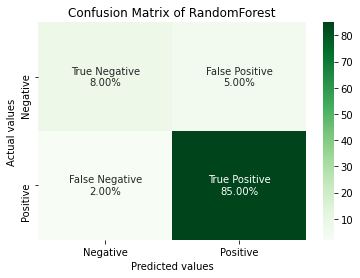

,Accuracy
LogisticRegression,0.97
KNeighbors,0.97
AdaBoost,0.97
Neural Network,0.96
SVM,0.95
Decision Tree,0.95
RandomForest,0.93
Naive Bayse,0.91
QuadraticDiscriminantAnalysis,0.87


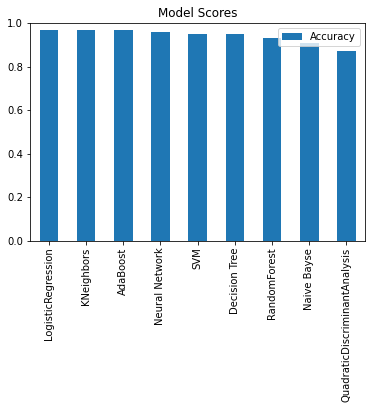

In [59]:
# Model selection (Binary classification)

X_train_bin=X_train
X_test_bin=X_test
y_train_bin=pro_train_data['Binary_RUL']
y_test_bin=pro_test_data["Binary_RUL"]

def analyse_binary_classification_models(train, labels):
    results = {}
    
    def c_matrix(y_true,y_pred,name):
        c_matrix = confusion_matrix(y_true,y_pred)
        print("\n Confusion Matrix  \n \n",c_matrix)
        categories = ['Negative','Positive']
        prediction = ['True Negative','False Positive', 'False Negative','True Positive']
        percentage = ['{0:.2%}'.format(value) for value in c_matrix.flatten() / np.sum(c_matrix)]
        lab = [f'{m}\n{n}' for m, n in zip(prediction,percentage)]
        lab = np.asarray(lab).reshape(2,2)
        sns.heatmap(c_matrix,cmap = 'Greens' , fmt = '',annot = lab, xticklabels = categories, yticklabels = categories)
        plt.xlabel("Predicted values")
        plt.ylabel("Actual values")
        plt.title ("Confusion Matrix of " + name)
        plt.show()
        
    def test_model(clf,m_name):
        clf.fit(train, labels)
        y_pred_bin=clf.predict(X_test_bin)
        scores=accuracy_score(y_test_bin, y_pred_bin)
        c_matrix(y_test_bin,y_pred_bin,m_name)
        return scores 
    
    clf=LogisticRegression()
    print("LogisticRegression")
    results["LogisticRegression"]= test_model(clf,"LogisticRegression")
    
    clf= GaussianNB()
    print("Naive Bayse")
    results["Naive Bayse"]= test_model(clf,"Naive Bayse")
    
    
    clf = KNeighborsClassifier(3)
    print("KNeighbors")
    results["KNeighbors"] = test_model(clf,"KNeighbors")
    
    clf = SVC()
    print("SVC")
    results["SVM"] = test_model(clf,"SVC")
 
    clf = QuadraticDiscriminantAnalysis()
    print("QuadraticDiscriminantAnalysis")
    results["QuadraticDiscriminantAnalysis"] = test_model(clf,"QuadraticDiscriminantAnalysis")
    
    clf = MLPClassifier(alpha=1)
    print("Neural Network")
    results["Neural Network"] = test_model(clf,"Neural Network")
    
    clf = AdaBoostClassifier()
    print("AdaBoost")
    results["AdaBoost"] = test_model(clf,"AdaBoost")
    
    clf = DecisionTreeClassifier(max_depth=5)
    print("Decision Tree")
    results["Decision Tree"] = test_model(clf,"Decision Tree")
    
    clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
    print("RandomForest")
    results["RandomForest"] = test_model(clf,"RandomForest")
    
    results = pd.DataFrame.from_dict(results, orient='index')
    results.columns = ["Accuracy"] 
    results = results.sort_values(by=["Accuracy"], ascending=False)
    results.plot(kind="bar", title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0, 1])
    return results

analyse_binary_classification_models(X_train_bin, y_train_bin)

Model accuracy score with 100 decision-trees = 0.97
